In [26]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

In [27]:
iris = load_iris()

# Data array transposed
D = iris["data"].T

# Labels array
L = iris["target"]

D0 = D[:, L == 0]
D1 = D[:, L == 1]
D2 = D[:, L == 2]

hFeat = {
    0: "Sepal length",
    1: "Sepal width",
    2: "Petal length",
    3: "Petal width"
}

In [28]:
# Mean

mu = np.mean(D, axis=1).reshape(4, 1)
print("Mean: {0}".format(mu))

DC = D - mu

Mean: [[5.84333333]
 [3.05733333]
 [3.758     ]
 [1.19933333]]


In [21]:
# Covariance matrix

C = ((D - mu) @ (D - mu).T) / float(D.shape[1])

print("Covariance matrix: {0}".format(C))

Covariance matrix: [[ 0.68112222 -0.04215111  1.26582     0.51282889]
 [-0.04215111  0.18871289 -0.32745867 -0.12082844]
 [ 1.26582    -0.32745867  3.09550267  1.286972  ]
 [ 0.51282889 -0.12082844  1.286972    0.57713289]]


In [22]:
# variance and std deviation

var = np.var(D, axis=1)
std = np.std(D, axis=1)

print("Variance: {0}".format(var))
print("Standard deviation: {0}".format(std))

Variance: [0.68112222 0.18871289 3.09550267 0.57713289]
Standard deviation: [0.82530129 0.43441097 1.75940407 0.75969263]


In [23]:
# Computation repeated for each class

for cls in [0,1,2]:
    print('Class', cls)
    DCls = D[:, L==cls]
    mu = DCls.mean(1).reshape(DCls.shape[0], 1)
    print('Mean:')
    print(mu)
    C = ((DCls - mu) @ (DCls - mu).T) / float(DCls.shape[1])
    print('Covariance:')
    print(C)
    var = DCls.var(1)
    std = DCls.std(1)
    print('Variance:', var)
    print('Std. dev.:', std)
    print()

Class 0
Mean:
[[5.006]
 [3.428]
 [1.462]
 [0.246]]
Covariance:
[[0.121764 0.097232 0.016028 0.010124]
 [0.097232 0.140816 0.011464 0.009112]
 [0.016028 0.011464 0.029556 0.005948]
 [0.010124 0.009112 0.005948 0.010884]]
Variance: [0.121764 0.140816 0.029556 0.010884]
Std. dev.: [0.34894699 0.37525458 0.17191859 0.10432641]

Class 1
Mean:
[[5.936]
 [2.77 ]
 [4.26 ]
 [1.326]]
Covariance:
[[0.261104 0.08348  0.17924  0.054664]
 [0.08348  0.0965   0.081    0.04038 ]
 [0.17924  0.081    0.2164   0.07164 ]
 [0.054664 0.04038  0.07164  0.038324]]
Variance: [0.261104 0.0965   0.2164   0.038324]
Std. dev.: [0.51098337 0.31064449 0.46518813 0.19576517]

Class 2
Mean:
[[6.588]
 [2.974]
 [5.552]
 [2.026]]
Covariance:
[[0.396256 0.091888 0.297224 0.048112]
 [0.091888 0.101924 0.069952 0.046676]
 [0.297224 0.069952 0.298496 0.047848]
 [0.048112 0.046676 0.047848 0.073924]]
Variance: [0.396256 0.101924 0.298496 0.073924]
Std. dev.: [0.62948868 0.31925538 0.54634787 0.27188968]



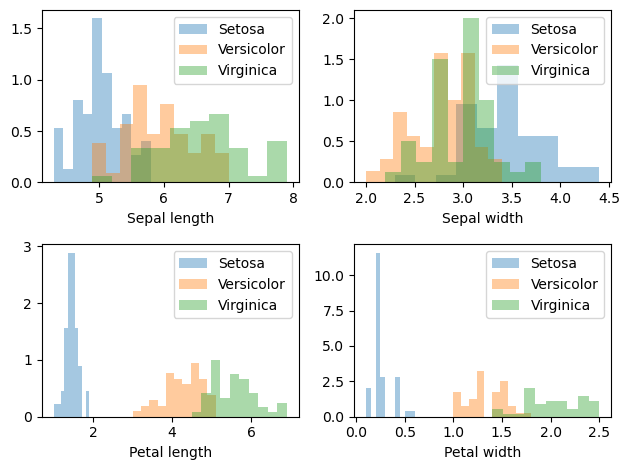

In [24]:
# Plot histograms

for dIdx in range(4):
    plt.subplot(2, 2, dIdx + 1)
    plt.hist(D0[dIdx], bins=10, density = True, alpha=0.4, label="Setosa")
    plt.hist(D1[dIdx], bins=10, density = True, alpha=0.4, label="Versicolor")
    plt.hist(D2[dIdx], bins=10, density = True, alpha=0.4, label="Virginica")
    plt.xlabel(hFeat[dIdx])
    plt.legend()
    plt.tight_layout()
    
plt.show()

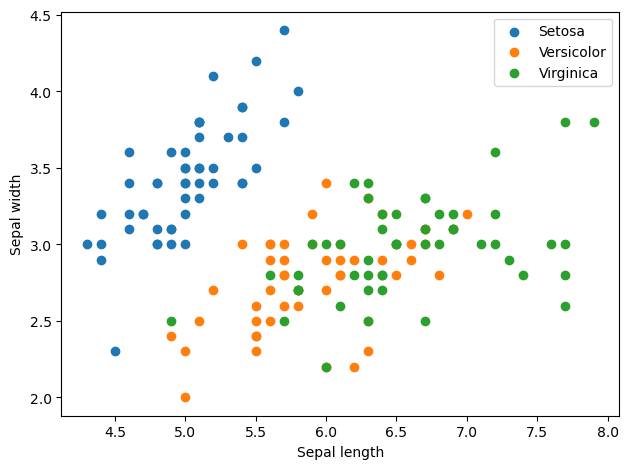

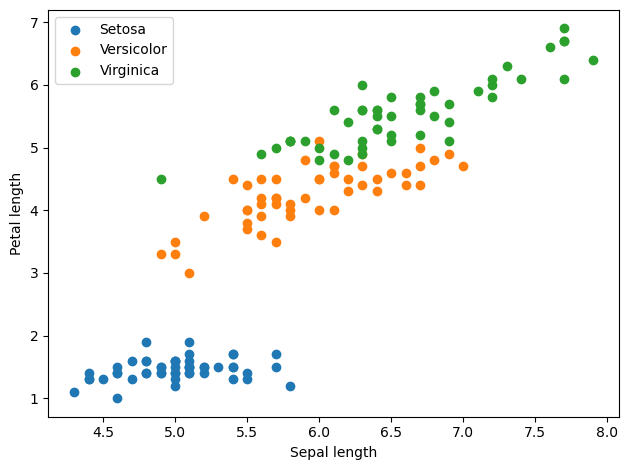

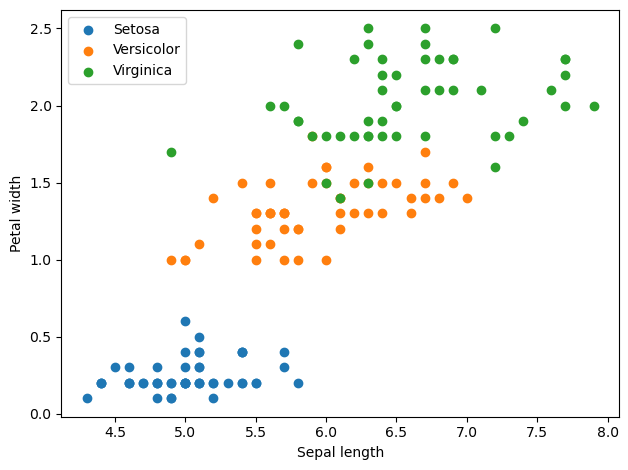

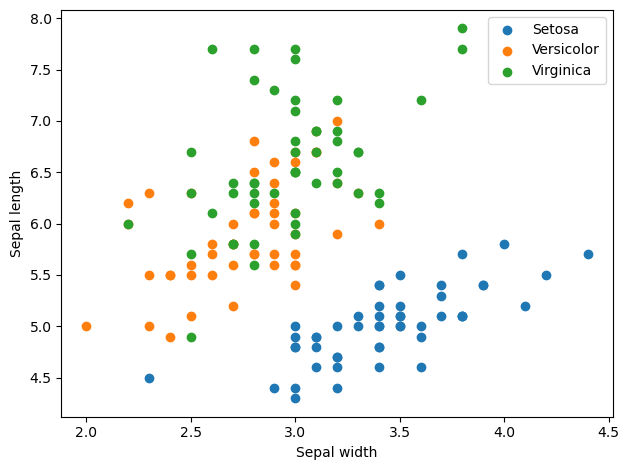

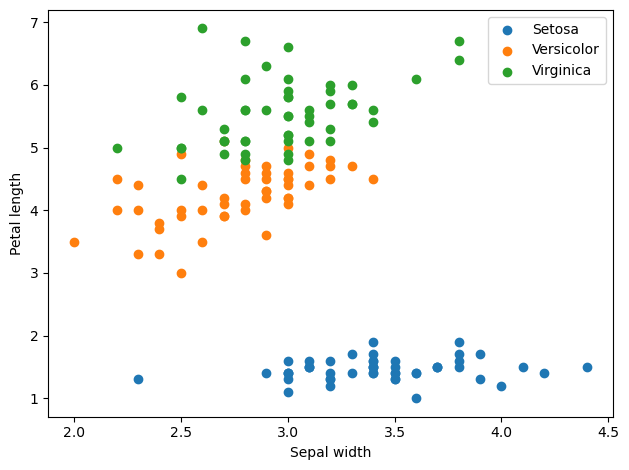

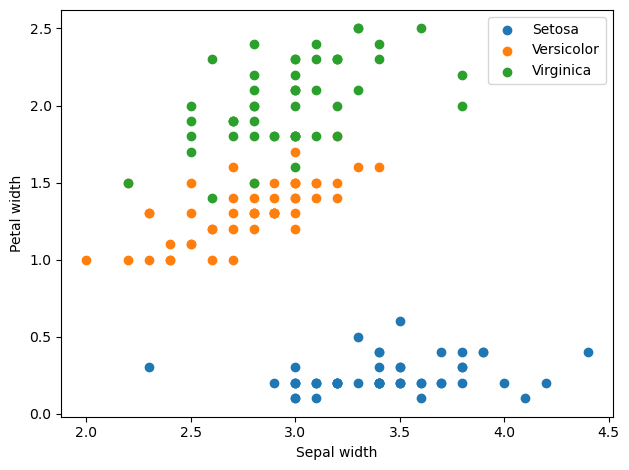

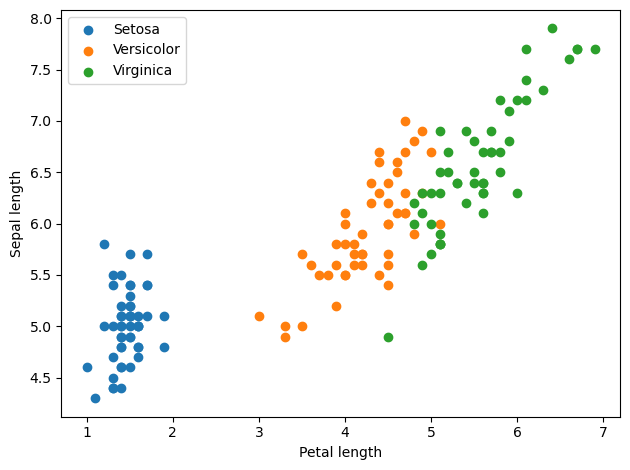

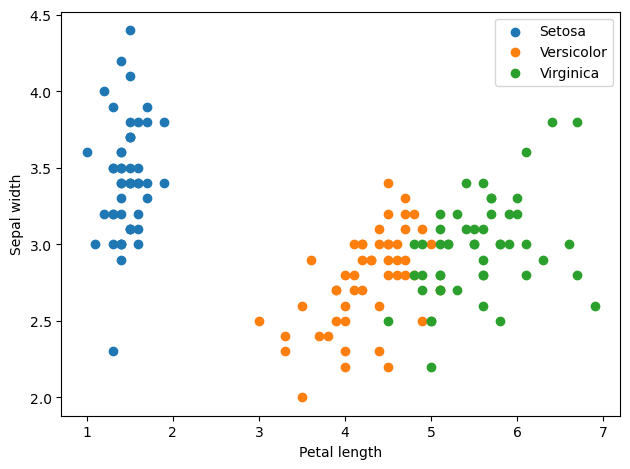

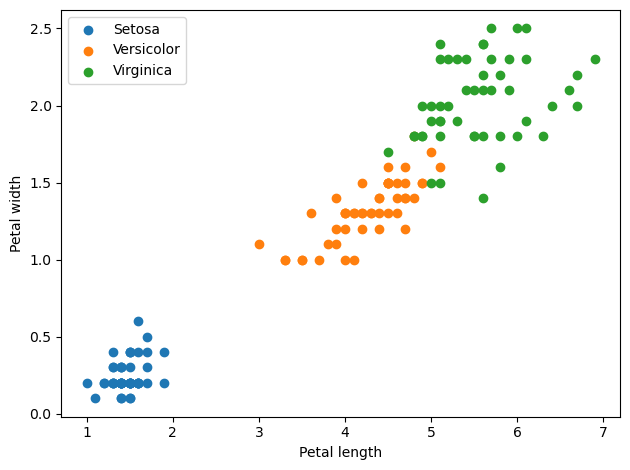

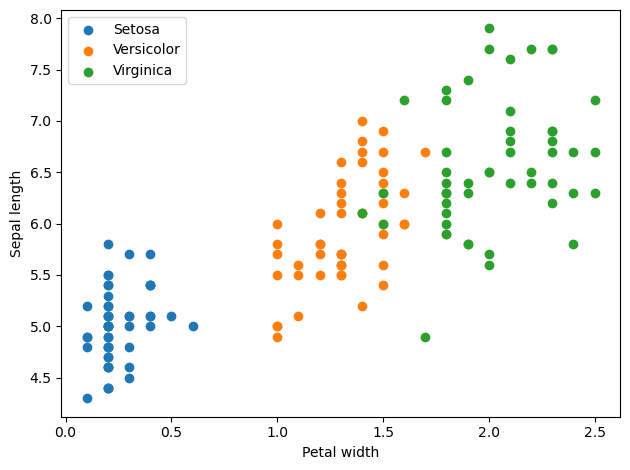

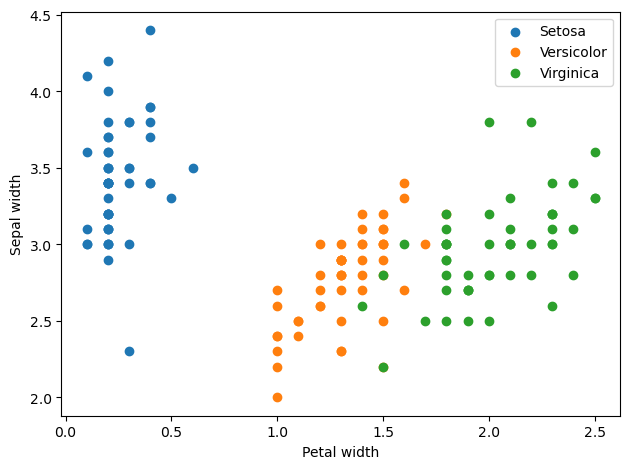

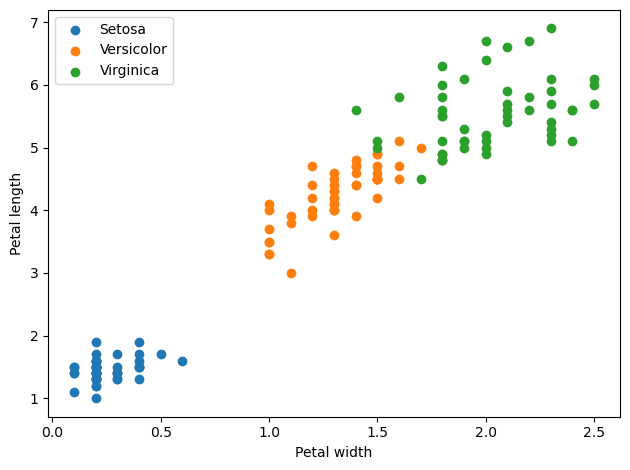

In [25]:
# Scatter plots

for dIdx1 in range(4):
    for dIdx2 in range(4):
        if dIdx1 == dIdx2:
            continue
        plt.figure()
        plt.xlabel(hFeat[dIdx1])
        plt.ylabel(hFeat[dIdx2])
        plt.scatter(D0[dIdx1, :], D0[dIdx2, :], label = 'Setosa')
        plt.scatter(D1[dIdx1, :], D1[dIdx2, :], label = 'Versicolor')
        plt.scatter(D2[dIdx1, :], D2[dIdx2, :], label = 'Virginica')
    
        plt.legend()
        plt.tight_layout() # Use with non-default font size to keep axis label inside the figure
        plt.savefig('scatter_%d_%d.pdf' % (dIdx1, dIdx2))
    plt.show()